
# Four layered Bragg fiber exact fields 

Corresponds to N2 configuration in paper by Bird.

### This notebook contains work on TE and TM modes for the N2 configuration

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from fiberamp.fiber.microstruct.bragg import plotlogf, plotlogf_real
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

ts = [15*2.7183333333333333e-6, 15*2/3*1e-6, 10*2.7183333333333333e-6, 15*2/3*1e-6]
mats = ['air', 'glass', 'air', 'glass']
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_air, lambda x:n_glass]
maxhs = [.1, .015, .05, .01]

n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)

In [3]:
A = BraggExact(ts=ts,ns=ns, mats=mats, maxhs=maxhs, wl=1.8e-6)


Boundary names not provided, using default names.


In [4]:
Draw(CF(list(A.ns)), A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [5]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

174.58130049031047

In [6]:
outer = 'h2'
nu = 1

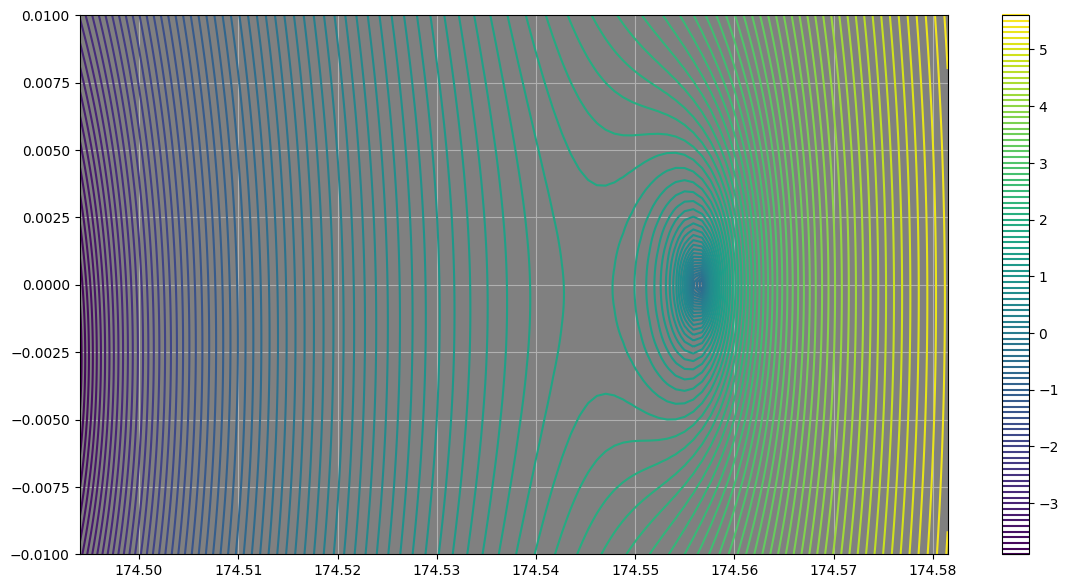

In [7]:
%matplotlib inline
plotlogf(A.determinant, .9995*k_low, 1.000001*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100)

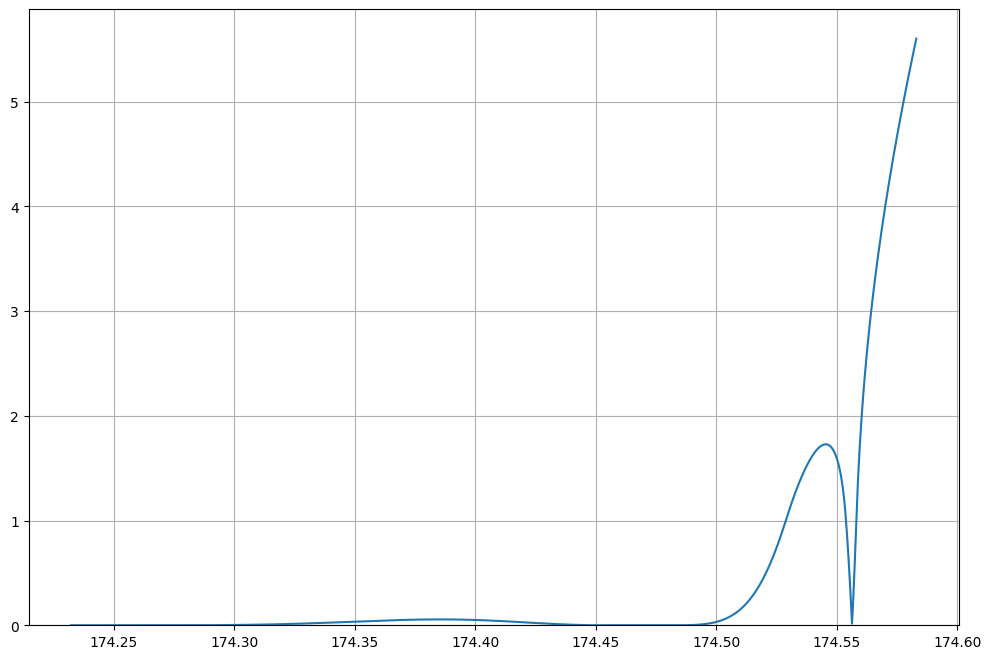

In [8]:
plotlogf_real(A.determinant, .998*k_low, 1.00001*k_low, nu, outer)

In [9]:
guess = np.array(.99999*k_low)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


Scaled beta:  (174.55638247019166-4.332951957420331e-07j) . Residual of determinant:  1.4031905029577413e-11


# Bragg Exact Fields

In [10]:
Fs = A.all_fields(beta1, nu, outer)

## Z-Components

In [13]:
Draw(1e1*Fs['Ez'], A.mesh)

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.23…

BaseWebGuiScene

In [ ]:
Draw(Fs['Ephi'].imag, A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Hphi'].imag, A.mesh)

## Hybrid Transverse fields

In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Htv'].real, A.mesh, vectors={'grid_size':100})

# TE/TM fields

The pairs of TE/TM modes are extremely tight.  We try to pick out the lowest loss ones below.  Note the extreme zoom on the determinant plot

In [ ]:
outer = 'h2'
nu = 0

In [ ]:
plotlogf(A.determinant, .9996375*k_low, .999639*k_low, -.00001,.00001, nu, outer,
         iref=100, rref=100, levels=100, figsize=(14,8))

In [ ]:
guess = np.array(5.2355e1+.00045 -5e-6j)

betaR = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", betaR, ". Residual of determinant: ", abs(A.determinant(betaR, nu, outer)))


# Bragg Exact Fields

In [ ]:
FsR = A.all_fields(betaR, nu, outer)

# First is a TM mode

## Z-Components

In [ ]:
Draw(1e1*FsR['Ez'], A.mesh)

In [ ]:
Draw(FsR['Hz'], A.mesh)

## Transverse fields

In [ ]:
Draw(FsR['Etv'].real, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(FsR['Etv'].imag, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(FsR['Htv'].real, A.mesh, vectors={'grid_size':100})

In [ ]:
Draw(FsR['Htv'].imag, A.mesh, vectors={'grid_size':100})

# Appears beta with higher real part was TM, now for TE

In [ ]:
outer = 'h2'
nu = 0

In [ ]:
plotlogf(A.determinant, .9996375*k_low, .999639*k_low, -.00001,.00001, nu, outer,
         iref=100, rref=100, levels=100, figsize=(14,8))

In [ ]:
guess = np.array(5.2355e1+.00025 - 1e-6j)

betaL = newton(A.determinant, guess, args=(nu, outer), tol = 1e-15)

print("Scaled beta: ", betaL, ". Residual of determinant: ", abs(A.determinant(betaL, nu, outer)))


# Bragg Exact Fields

In [ ]:
FsL = A.all_fields(betaL, nu, outer)

## Z-Components

In [ ]:
Draw(1e1*FsL['Ez'], A.mesh)

In [ ]:
Draw(FsL['Hz'], A.mesh)

## Transverse fields

## Etv

In [ ]:
Draw(FsL['Etv'].real, A.mesh, vectors={'grid_size':100})

In [ ]:
Draw(FsL['Etv'].imag, A.mesh, vectors={'grid_size':100})


## Htv

In [ ]:
Draw(FsL['Htv'].real, A.mesh, vectors={'grid_size':100})

In [ ]:
Draw(FsL['Htv'].imag, A.mesh, vectors={'grid_size':100})
